In [1]:
import numpy as np
import random 
import pandas as pd
import os
import time
import csv 
import warnings

# MATH and STATS:
import math
from scipy.stats import t
from scipy.stats import multivariate_normal
from scipy.special import gamma

# PLOT:
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *
%matplotlib inline

# SKLEARN:
from sklearn import metrics # AMII and ARI
from sklearn import decomposition #PCA

# EMBEDDINGs:
import umap

In [2]:
from _fem import *
from import_subset_datasets import *
from clustering_accuracy import *

In [3]:
warnings.filterwarnings('ignore') # AMI warning

In [5]:
np.random.seed(44)
random.seed(44)

read_mnist = pd.read_csv(r"data\mnist_train.csv")

mnist_labels_raw = read_mnist.iloc[:, 0]

mnist_data = read_mnist.iloc[:, 1:]

selected_digits = [3, 8, 6]
selected_digits_2 = [1,4,5]

mnist_pca, mnist_labels, mnist_raw, ve = import_subset(mnist_data, mnist_labels_raw, selected_digits,30, 800)
mnist_pca_2, mnist_labels_2, mnist_raw_2, ve2 = import_subset(mnist_data, mnist_labels_raw, selected_digits_2, 30, 800)

## 3,8,6

In [6]:
embedding = umap.UMAP(metric='euclidean').fit_transform(mnist_pca)

label = pd.Series(mnist_labels)
em = pd.DataFrame(embedding, columns=['A','B']) 
em['label'] = label.astype(str)
gg = ggplot(aes(x='A', y='B', color='label'), data=em)+geom_point()+ scale_color_discrete(guide=False)+ labs(x = "", y = "") 
#gg.save("MNIST38_real.png",dpi =300)

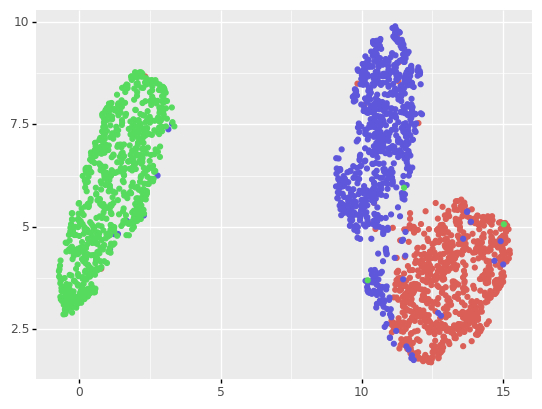

<ggplot: (139679517483)>

In [7]:
gg

In [18]:
nrep = 10
frem_AMI = np.zeros((nrep, ))
frem_ARI = np.zeros((nrep, ))
frem_ACC = np.zeros((nrep, ))

for rep in range(nrep):
    fem = FEM(3, thres=0).fit(mnist_pca)  
    labels_fem = fem.labels_ 

    frem_ARI[rep] = metrics.adjusted_rand_score(label, labels_fem.astype(str))
    frem_AMI[rep] = metrics.adjusted_mutual_info_score(label, labels_fem.astype(str))
    frem_ACC[rep] = acc(label.astype(int), labels_fem.astype(int))

In [19]:
print(np.median(frem_AMI))
print(np.median(frem_ARI))
print(np.median(frem_ACC))

0.7774940150889479
0.8199381488308934
0.935


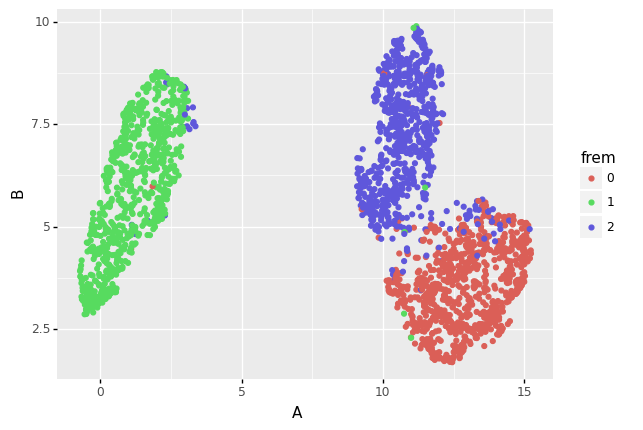

<ggplot: (139679482073)>

In [20]:
em['frem'] = labels_fem.astype(str)
gg = ggplot(aes(x='A', y='B', color='frem'), data=em)+geom_point()+ scale_color_discrete(guide=False)+ labs(x = "", y = "") 
ggplot(em, aes(x='A',y='B',color='frem')) + geom_point()

## 1,4,5

In [21]:
embedding = umap.UMAP(metric='euclidean').fit_transform(mnist_pca_2)

label = pd.Series(mnist_labels_2)
em = pd.DataFrame(embedding, columns=['A','B']) 
em['label'] = label.astype(str)
gg = ggplot(aes(x='A', y='B', color='label'), data=em)+geom_point()+ scale_color_discrete(guide=False)+ labs(x = "", y = "") 
#gg.save("MNIST38_real.png",dpi =300)

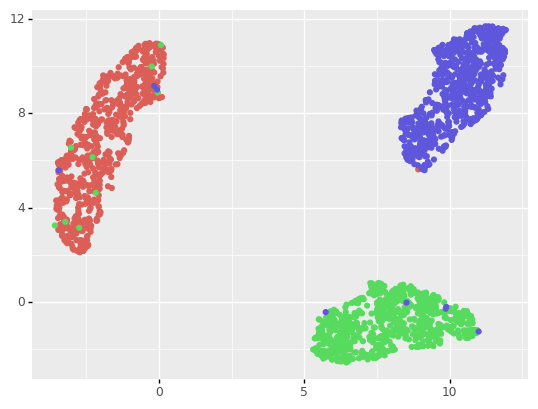

<ggplot: (139680914667)>

In [22]:
gg

In [23]:
nrep = 10
frem_AMI = np.zeros((nrep, ))
frem_ARI = np.zeros((nrep, ))
frem_ACC = np.zeros((nrep, ))

for rep in range(nrep):
    fem = FEM(3, thres=0).fit(mnist_pca_2)  
    labels_fem = fem.labels_ 

    frem_ARI[rep] = metrics.adjusted_rand_score(label, labels_fem.astype(str))
    frem_AMI[rep] = metrics.adjusted_mutual_info_score(label, labels_fem.astype(str))
    frem_ACC[rep] = acc(label.astype(int), labels_fem.astype(int))

In [24]:
print(np.median(frem_AMI))
print(np.median(frem_ARI))
print(np.median(frem_ACC))

0.9402095802035974
0.9653300956470293
0.9883333333333333


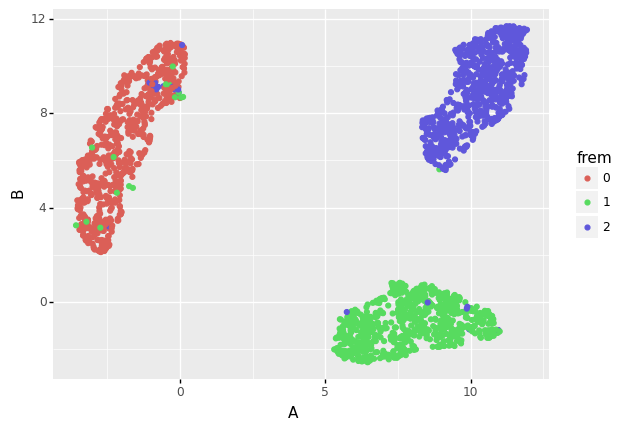

<ggplot: (139678744351)>

In [25]:
em['frem'] = labels_fem.astype(str)
gg = ggplot(aes(x='A', y='B', color='frem'), data=em)+geom_point()+ scale_color_discrete(guide=False)+ labs(x = "", y = "") 
ggplot(em, aes(x='A',y='B',color='frem')) + geom_point()